# * Rainfall Prediction - Weather Forecasting

# Problem Statement:

#                                    Rain Prediction –Weather forecasting

# Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

# Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

# 1. Problem Statement: 
# a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

# b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\New folder\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Lets check the shape of dataset
df.shape

(8425, 23)

So , here we have 8425 rows and 23 columns

# Data is Duplicated ?

In [4]:
df.duplicated().sum()

1663

so, here we have 1663 Duplicated Data

In [5]:
# let's check the data type of this  dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

so here we have

object type - Data, Location,WindGustdir,WindDir9am,WindDir3am,RainToday,RainTomorrow

Float64 type - Then All columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# value count Function

In [7]:
df['Date'].value_counts()

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [8]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [9]:
df['MinTemp'].value_counts()

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

In [10]:
df['MaxTemp'].value_counts()

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

In [11]:
df['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [12]:
df['Evaporation'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [13]:
df['Sunshine'].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [14]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [15]:
df['WindGustSpeed'].value_counts()

39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

In [16]:
df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [17]:
df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [18]:
df['WindSpeed9am'].value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [19]:
df['WindSpeed3pm'].value_counts()

9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

In [20]:
df['Humidity9am'].value_counts()

73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

In [21]:
df['Humidity3pm'].value_counts()

55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

In [22]:
df['Pressure9am'].value_counts()

1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: Pressure9am, Length: 384, dtype: int64

In [23]:
df['Pressure3pm'].value_counts()

1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64

In [24]:
df['Cloud9am'].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [25]:
df['Cloud3pm'].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

In [26]:
df['Temp9am'].value_counts()

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64

In [27]:
df['Temp3pm'].value_counts()

19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64

In [28]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [29]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [30]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Date:

In [31]:
# Date - The date of the observation
df['Date'].nunique()

3004

In [32]:
df[['Year','Month','Date']] = df['Date'].str.split("-",expand = True)

In [33]:
# converting objects into integer datatype

df[['Year','Month','Date']] = df[['Year','Month','Date']].astype(int)

In [34]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12
1,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12
2,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12
3,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12
4,5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12


# Null  Values

In [35]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
dtype: int64

# Fill the NUll Values 

In [36]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [37]:
# check to done with Fill Null values
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

In [38]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,15.741958,13.193305,23.859976,2.805913,5.389395,7.632205,40.036320,13.840000,18.539585,67.822496,51.249790,1017.640233,1015.236075,4.691157,4.647953,17.762015,22.442934,2012.102433,6.442136
std,8.787354,5.379488,6.114516,10.309308,3.852004,2.825451,13.781296,10.128896,9.704899,16.774231,18.311894,6.275759,6.217451,2.437110,2.310476,5.608301,5.945849,2.473137,3.437994
min,1.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000
25%,8.000000,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,2010.000000,3.000000
50%,16.000000,13.200000,23.300000,0.000000,5.389395,7.632205,39.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,5.000000,5.000000,17.762015,22.000000,2011.000000,6.000000
75%,23.000000,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,2014.000000,9.000000
max,31.000000,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000


# EXPLORATORY DATA ANALYSIS (EDA)

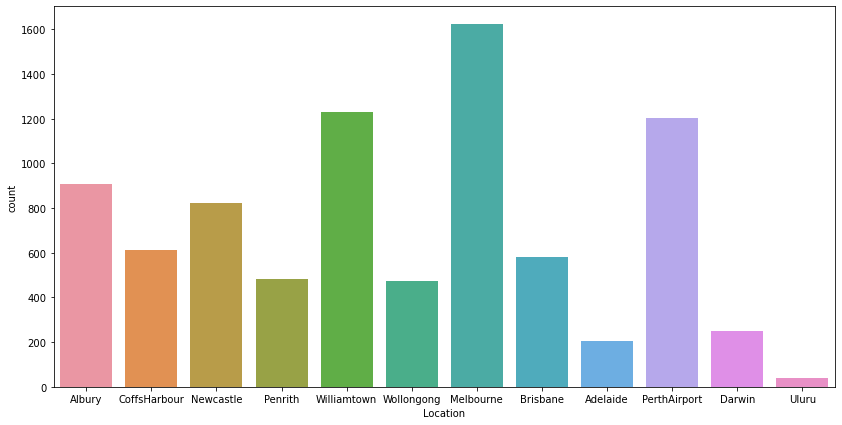

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(x='Location',data=df)
plt.show()

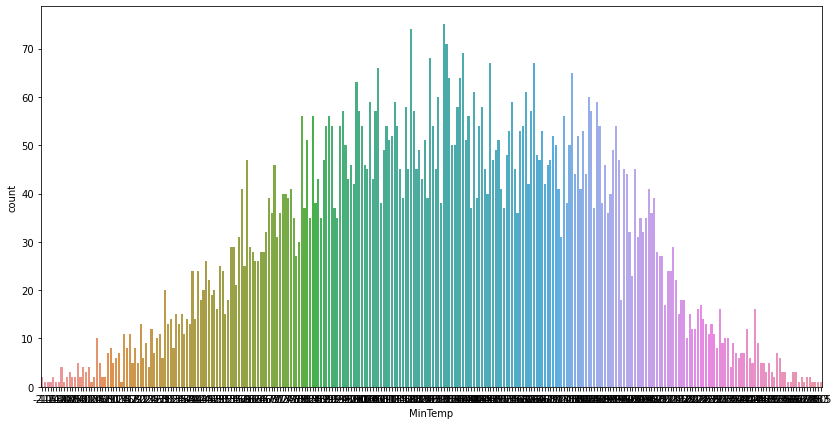

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(x='MinTemp',data=df)
plt.show()

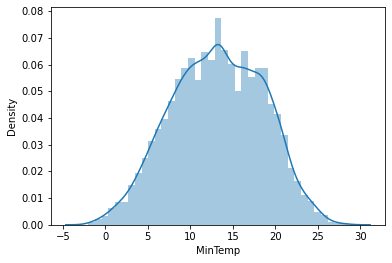

In [41]:
sns.distplot(df['MinTemp'])
plt.show()

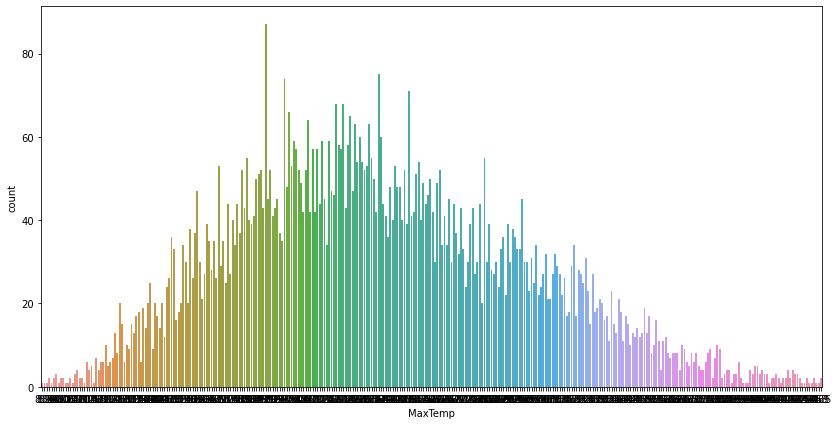

In [42]:
plt.figure(figsize=(14,7))
sns.countplot(x='MaxTemp',data=df)
plt.show()

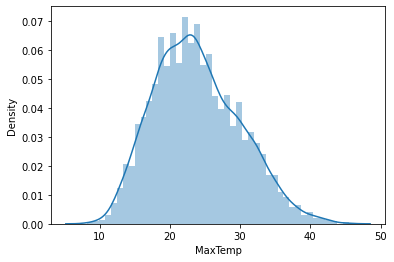

In [43]:
sns.distplot(df['MaxTemp'])
plt.show()

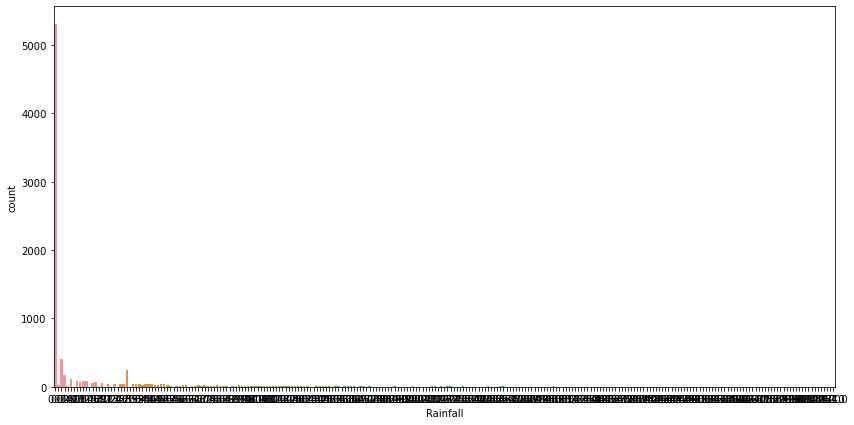

In [44]:
plt.figure(figsize=(14,7))
sns.countplot(x='Rainfall',data=df)
plt.show()

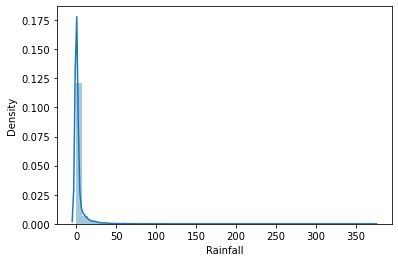

In [45]:
sns.distplot(df['Rainfall'])
plt.show()

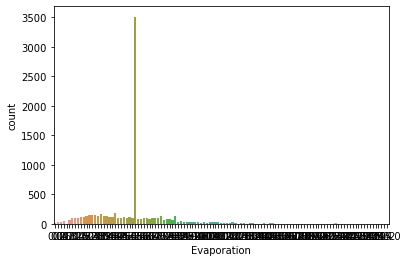

In [46]:
sns.countplot(x='Evaporation',data=df)
plt.show()

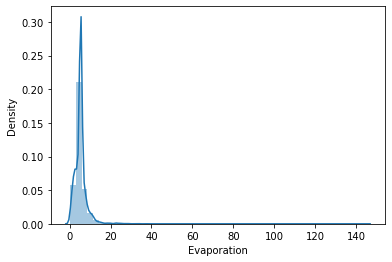

In [47]:
sns.distplot(df['Evaporation'])
plt.show()

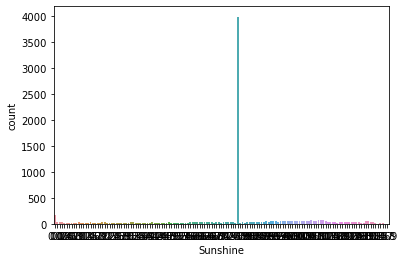

In [48]:
sns.countplot(x='Sunshine',data=df)
plt.show()

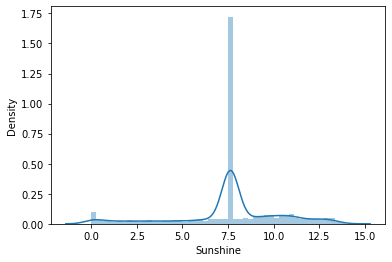

In [49]:
sns.distplot(df['Sunshine'])
plt.show()

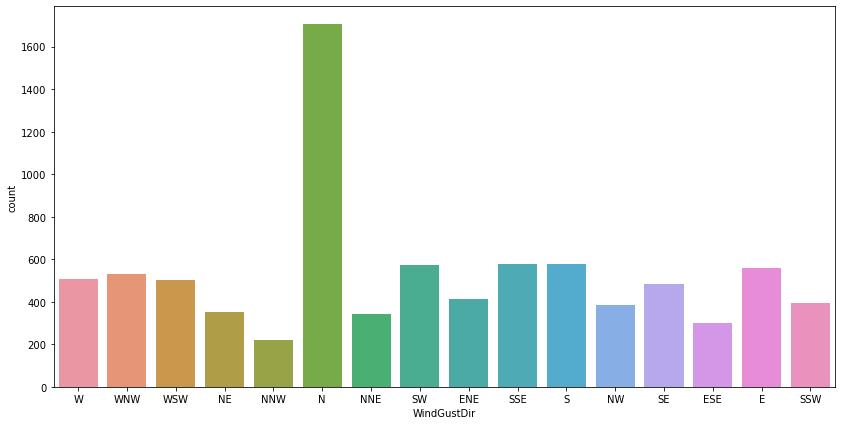

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(x='WindGustDir',data=df)
plt.show()

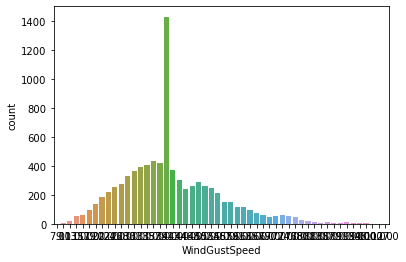

In [51]:
sns.countplot(x='WindGustSpeed',data=df)
plt.show()

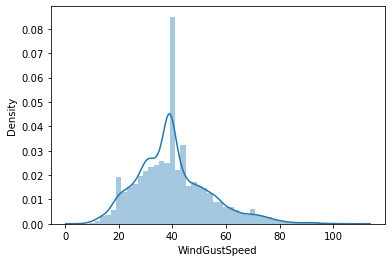

In [52]:
sns.distplot(df['WindGustSpeed'])
plt.show()

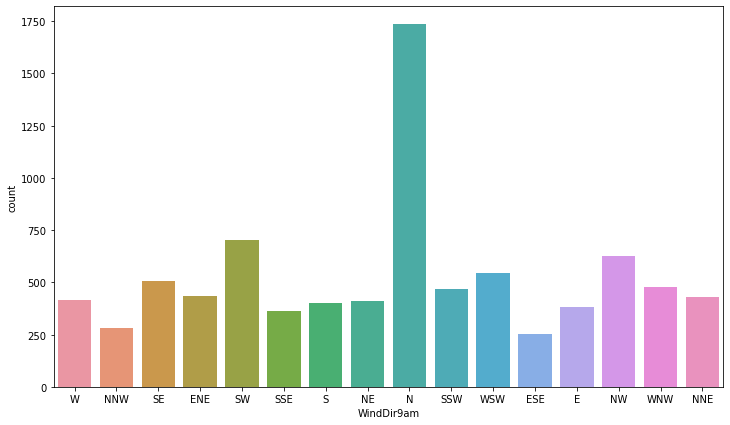

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir9am',data=df)
plt.show()

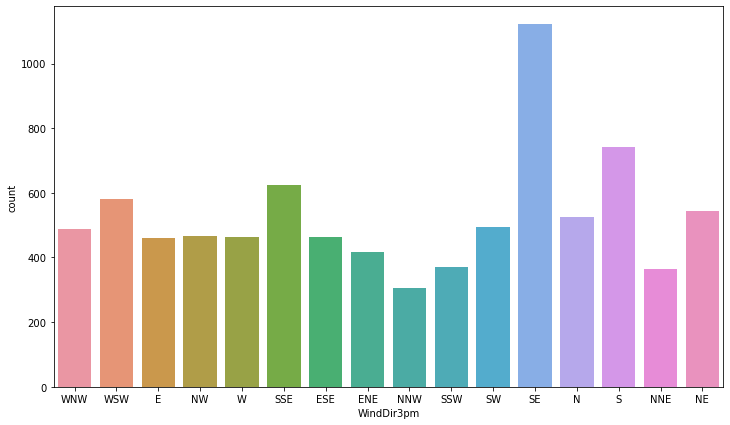

In [54]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir3pm',data=df)
plt.show()

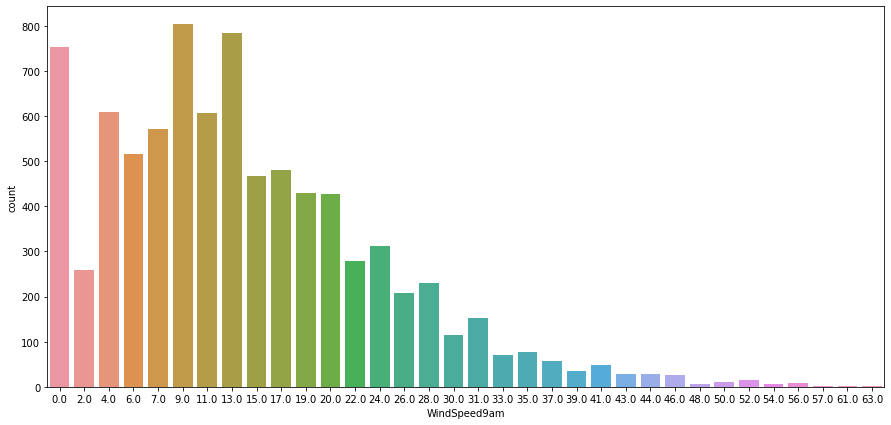

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x='WindSpeed9am',data=df)
plt.show()

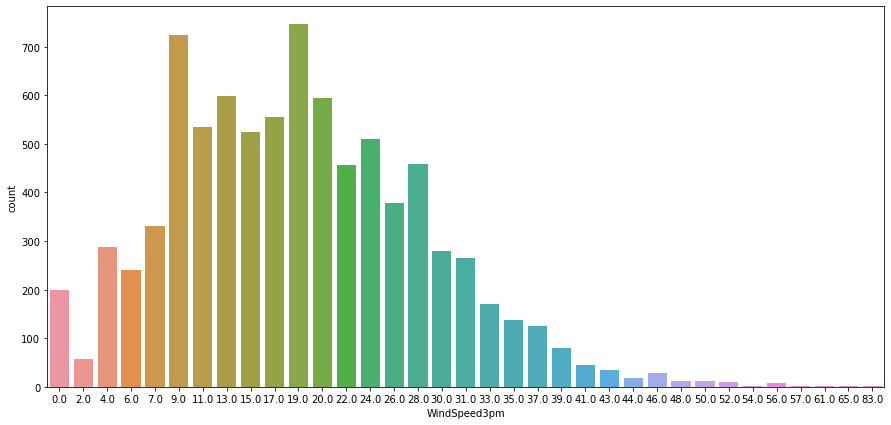

In [56]:
plt.figure(figsize=(15,7))
sns.countplot(x='WindSpeed3pm',data=df)
plt.show()

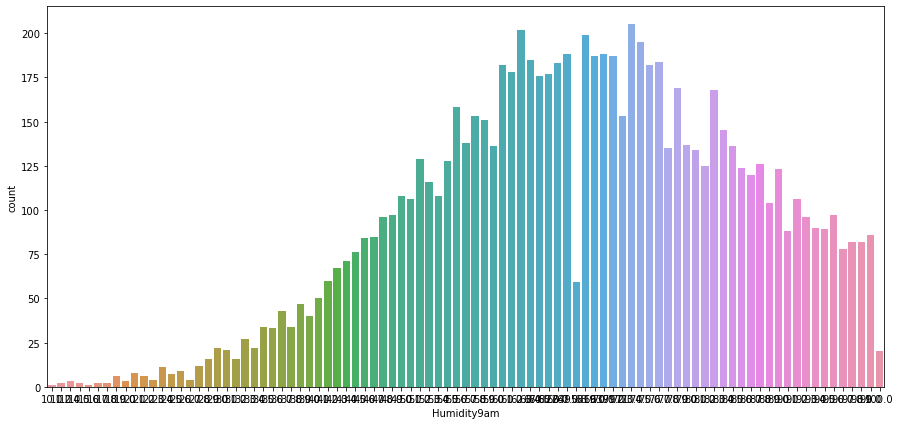

In [57]:
plt.figure(figsize=(15,7))
sns.countplot(x='Humidity9am',data=df)
plt.show()

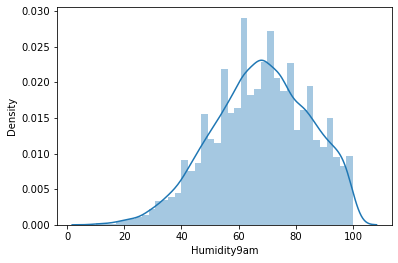

In [58]:
sns.distplot(df['Humidity9am'])
plt.show()

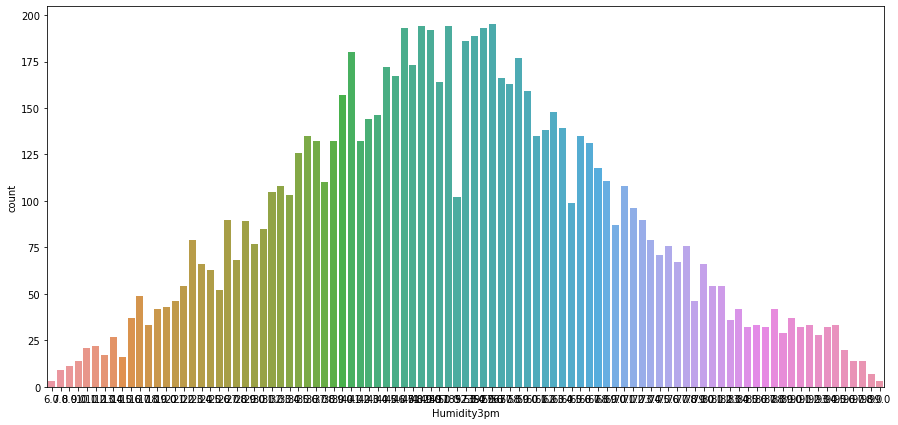

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x='Humidity3pm',data=df)
plt.show()

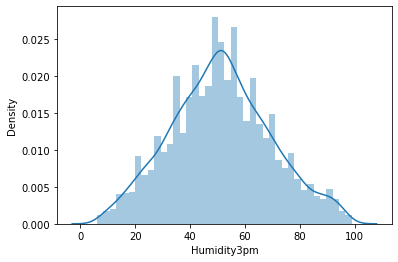

In [60]:
sns.distplot(df['Humidity3pm'])
plt.show()

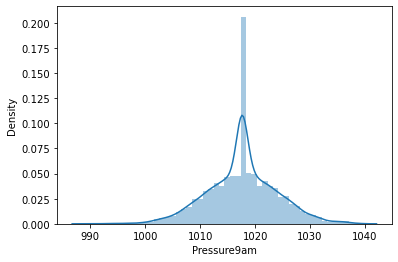

In [61]:
sns.distplot(df['Pressure9am'])
plt.show()

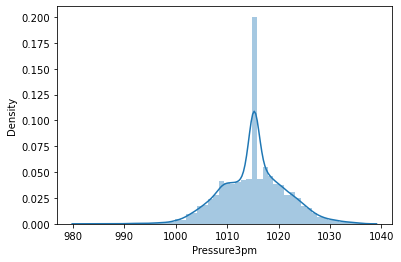

In [62]:
sns.distplot(df['Pressure3pm'])
plt.show()

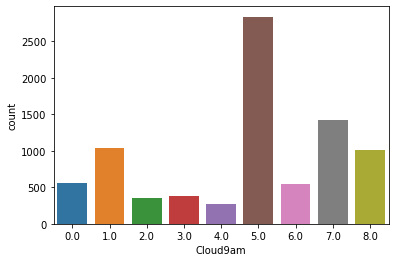

In [63]:
sns.countplot(x='Cloud9am',data=df)
plt.show()

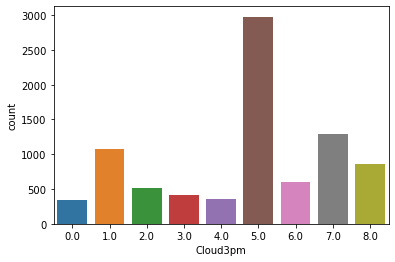

In [64]:
sns.countplot(x='Cloud3pm',data=df)
plt.show()

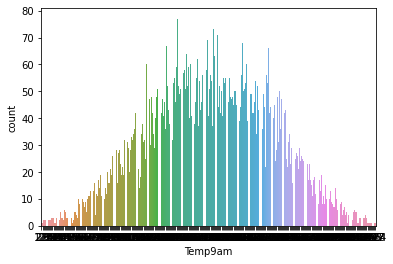

In [65]:
sns.countplot(x='Temp9am',data=df)
plt.show()

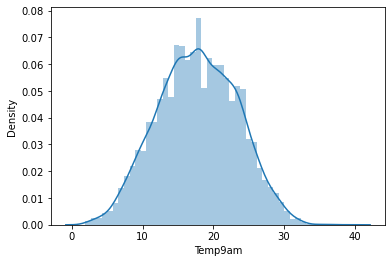

In [66]:
sns.distplot(df['Temp9am'])
plt.show()

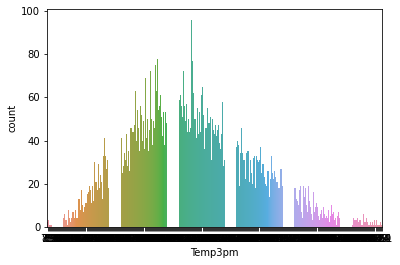

In [67]:
sns.countplot(x='Temp3pm',data=df)
plt.show()

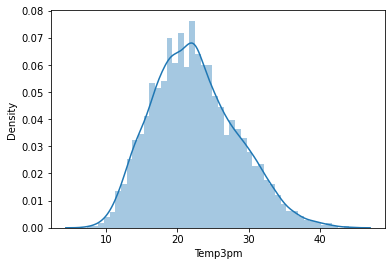

In [68]:
sns.distplot(df['Temp3pm'])
plt.show()

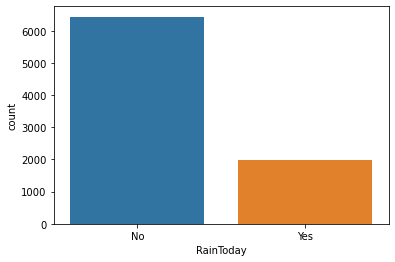

In [69]:
sns.countplot(x='RainToday',data=df)
plt.show()

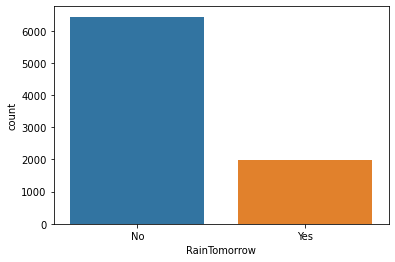

In [70]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

In [71]:
# Find top 12 location
val=df.Location.value_counts().values
label = df.Location.value_counts().index

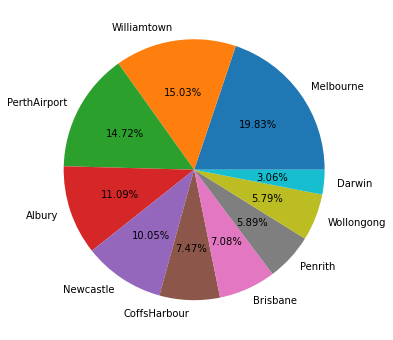

In [72]:
plt.figure(figsize=(7,6))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='Location', ylabel='count'>

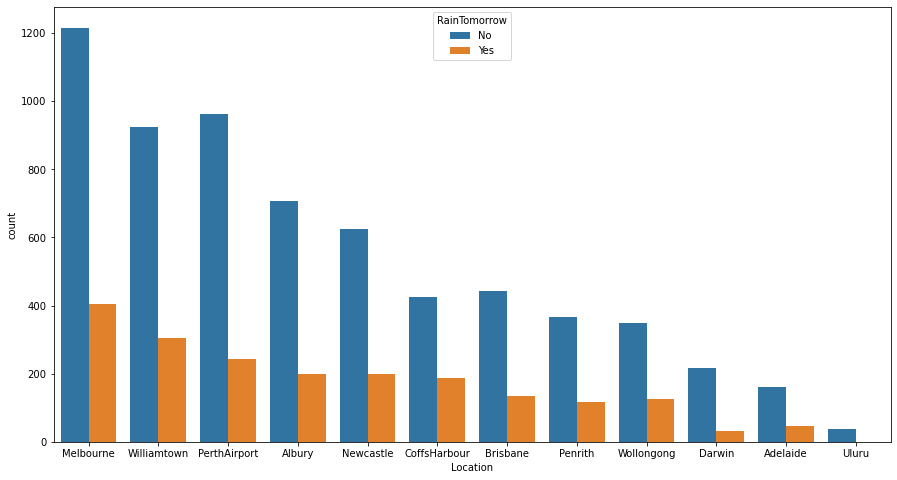

In [73]:
plt.figure(figsize=(15,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

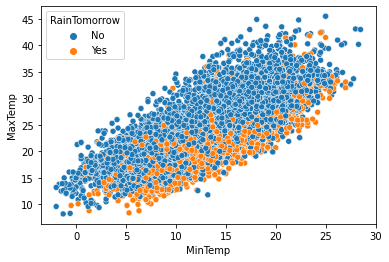

In [74]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

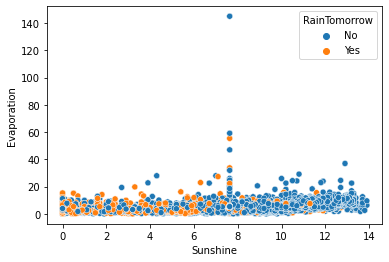

In [75]:
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

Text(0.5, 0, 'WindGustDir')

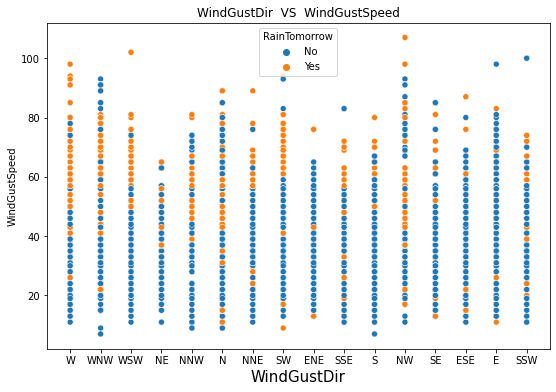

In [76]:
plt.figure(figsize=(9,6))
sns.scatterplot('WindGustDir','WindGustSpeed',hue='RainTomorrow',data=df)
plt.title('WindGustDir  VS  WindGustSpeed')
plt.xlabel('WindGustDir',fontsize=15)

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

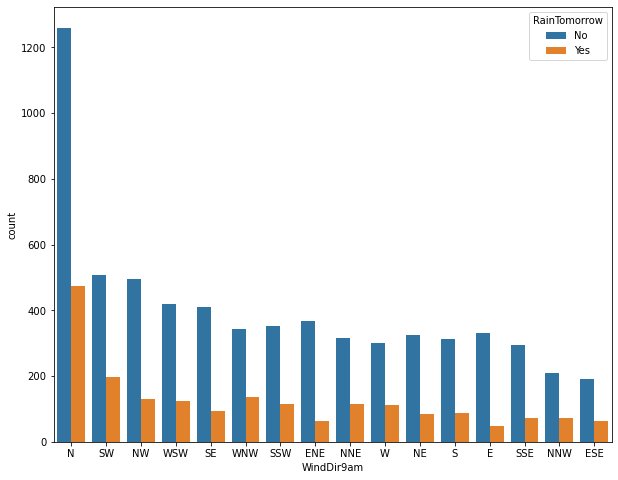

In [77]:
plt.figure(figsize=(10,8))
sns.countplot(df['WindDir9am'],order=df['WindDir9am'].value_counts().index,hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

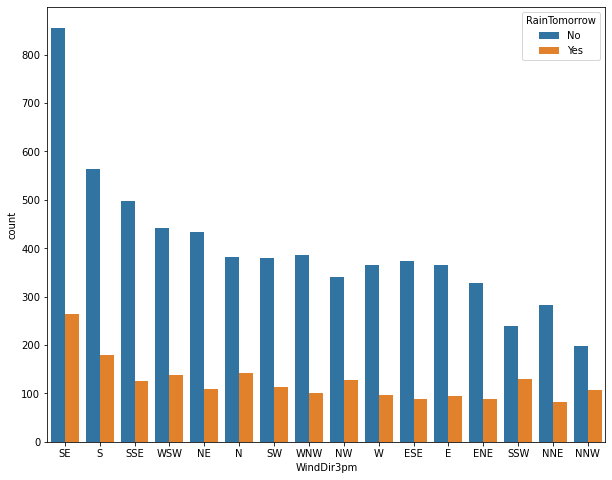

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(df['WindDir3pm'],order=df['WindDir3pm'].value_counts().index,hue=df['RainTomorrow'])

Text(0.5, 0, 'WindSpeed9am')

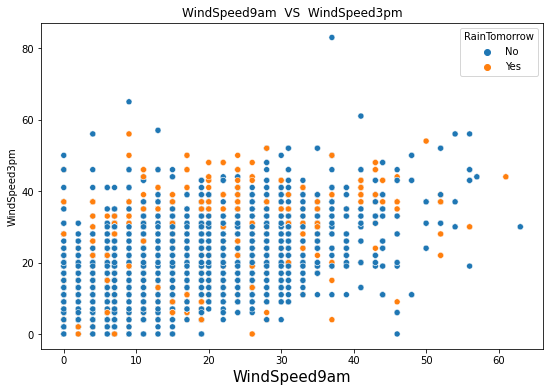

In [79]:
plt.figure(figsize=(9,6))
sns.scatterplot('WindSpeed9am','WindSpeed3pm',hue='RainTomorrow',data=df)
plt.title('WindSpeed9am  VS  WindSpeed3pm')
plt.xlabel('WindSpeed9am',fontsize=15)

Text(0.5, 0, 'Humidity9am')

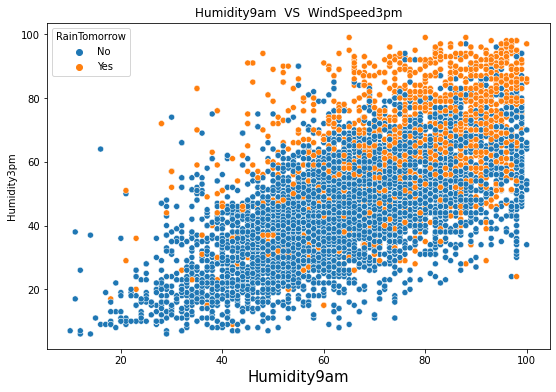

In [80]:
plt.figure(figsize=(9,6))
sns.scatterplot('Humidity9am','Humidity3pm',hue='RainTomorrow',data=df)
plt.title('Humidity9am  VS  WindSpeed3pm')
plt.xlabel('Humidity9am',fontsize=15)

Text(0.5, 0, 'Pressure9am')

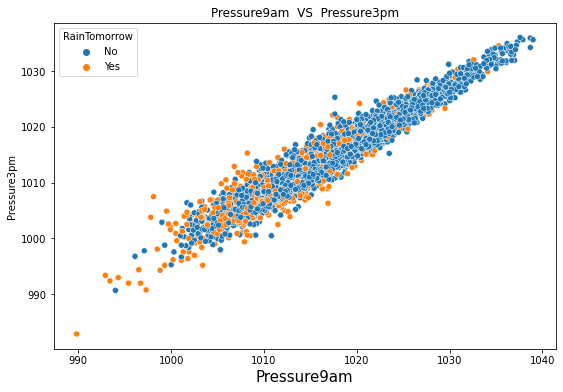

In [81]:
plt.figure(figsize=(9,6))
sns.scatterplot('Pressure9am','Pressure3pm',hue='RainTomorrow',data=df)
plt.title('Pressure9am  VS  Pressure3pm')
plt.xlabel('Pressure9am',fontsize=15)

<AxesSubplot:xlabel='Cloud9am', ylabel='count'>

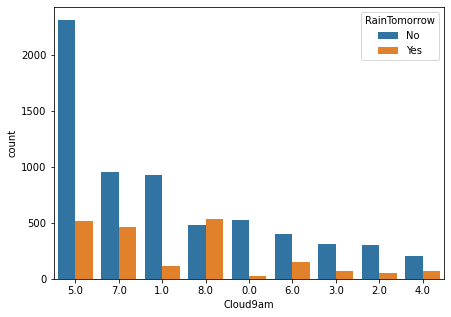

In [82]:
plt.figure(figsize=(7,5))
sns.countplot(df['Cloud9am'],order=df['Cloud9am'].value_counts().index,hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='count'>

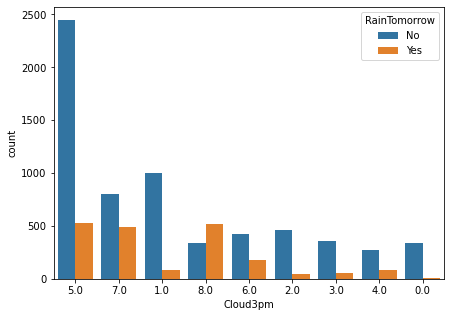

In [83]:
plt.figure(figsize=(7,5))
sns.countplot(df['Cloud3pm'],order=df['Cloud3pm'].value_counts().index,hue=df['RainTomorrow'])

Text(0.5, 0, 'Temp9am')

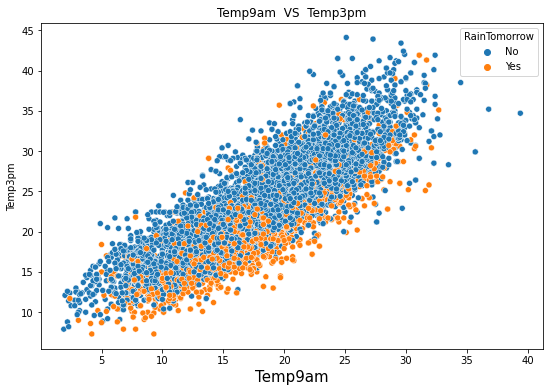

In [84]:
plt.figure(figsize=(9,6))
sns.scatterplot('Temp9am','Temp3pm',hue='RainTomorrow',data=df)
plt.title('Temp9am  VS  Temp3pm')
plt.xlabel('Temp9am',fontsize=15)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

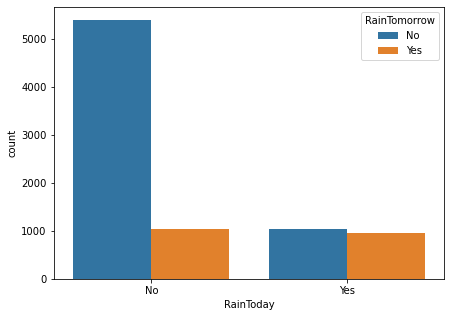

In [85]:
plt.figure(figsize=(7,5))
sns.countplot(df['RainToday'],order=df['RainToday'].value_counts().index,hue=df['RainTomorrow'])

# CHECKING FOR OUTLIERS

In [86]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,15.741958,13.193305,23.859976,2.805913,5.389395,7.632205,40.036320,13.840000,18.539585,67.822496,51.249790,1017.640233,1015.236075,4.691157,4.647953,17.762015,22.442934,2012.102433,6.442136
std,8.787354,5.379488,6.114516,10.309308,3.852004,2.825451,13.781296,10.128896,9.704899,16.774231,18.311894,6.275759,6.217451,2.437110,2.310476,5.608301,5.945849,2.473137,3.437994
min,1.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000
25%,8.000000,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,2010.000000,3.000000
50%,16.000000,13.200000,23.300000,0.000000,5.389395,7.632205,39.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,5.000000,5.000000,17.762015,22.000000,2011.000000,6.000000
75%,23.000000,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,2014.000000,9.000000
max,31.000000,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000


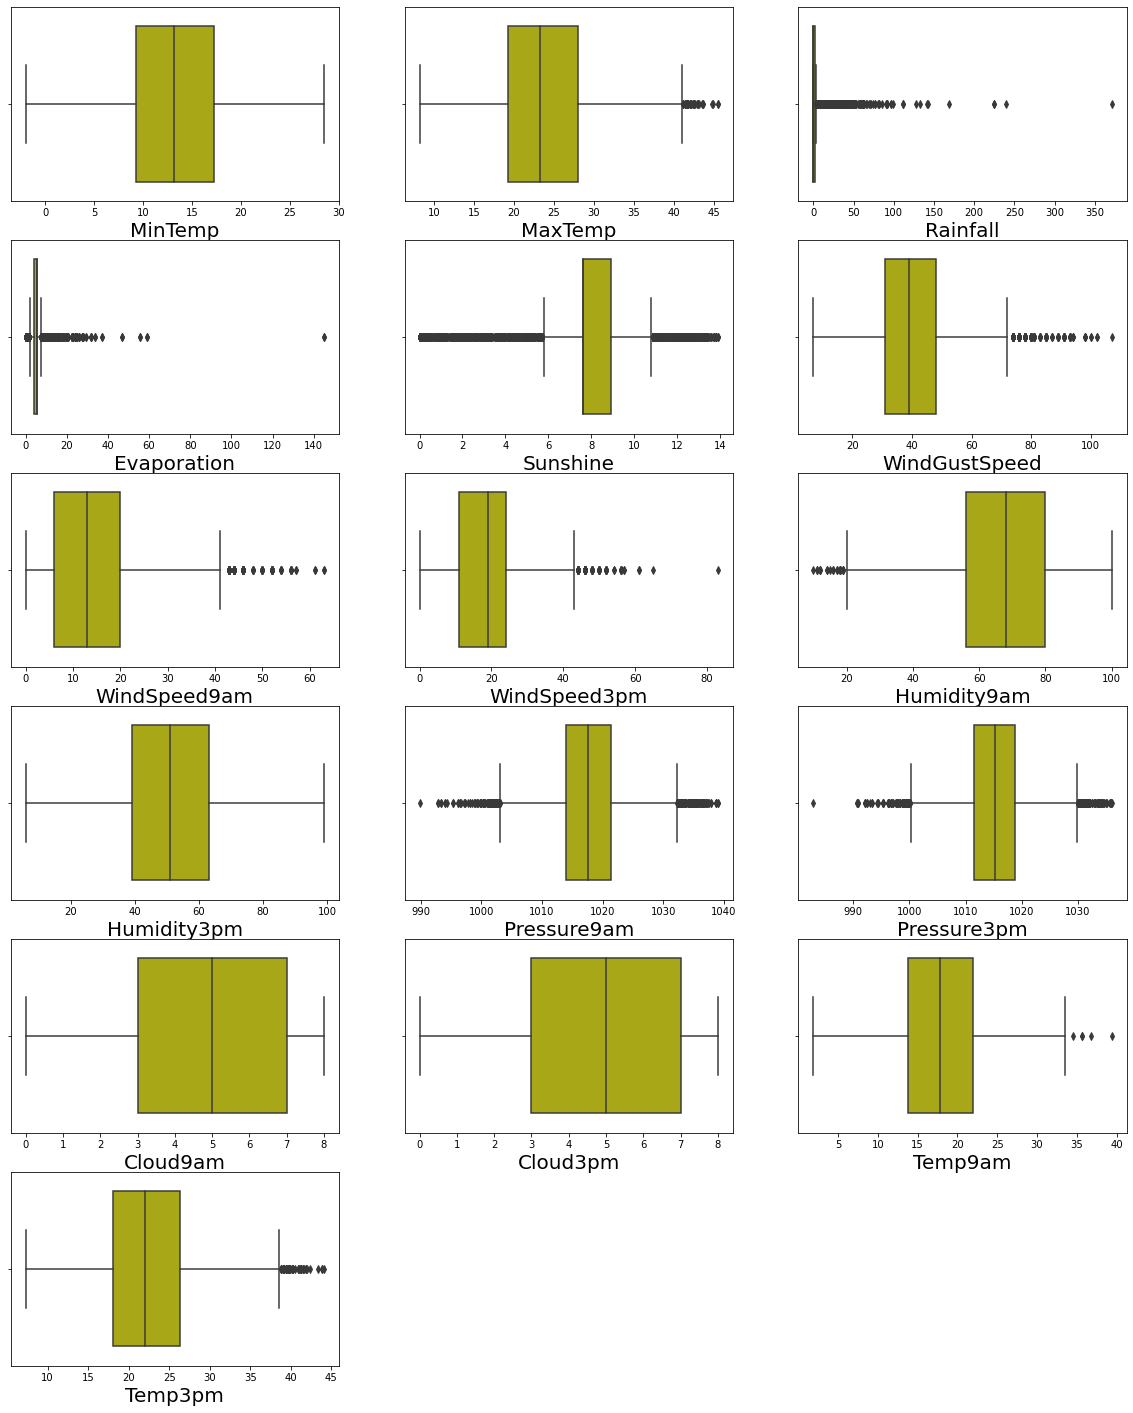

In [87]:
numerical_col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* Cloud3pm,Cloud9am,Humidity3pm,MinTemp are not having Outliers.
* Some feature are having outliers but those are categorical features.

# Removing Outliers:

In [88]:
df[numerical_col].skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.786153
WindSpeed9am      0.962761
WindSpeed3pm      0.492365
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.514801
Cloud3pm         -0.457713
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [89]:
for i in numerical_col:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

# Checking and removing Skewness:

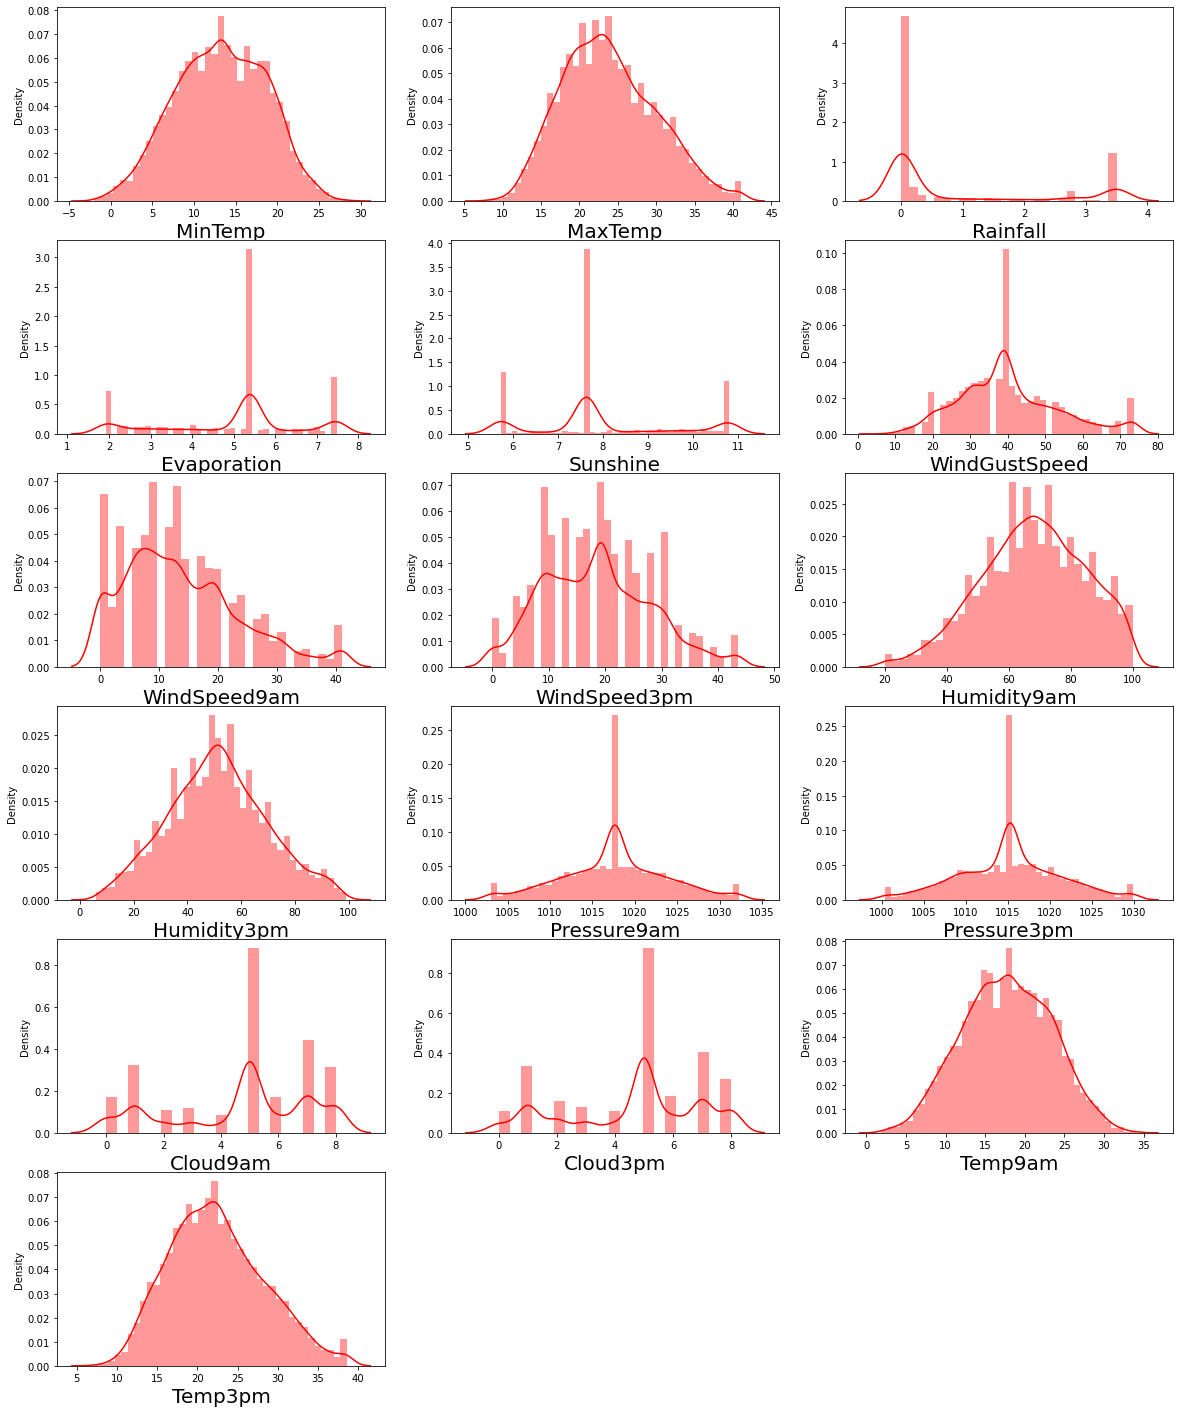

In [90]:
numerical_col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [91]:
df.skew()

Date             0.004260
MinTemp         -0.089989
MaxTemp          0.358988
Rainfall         1.219234
Evaporation     -0.419101
Sunshine         0.470693
WindGustSpeed    0.539607
WindSpeed9am     0.739837
WindSpeed3pm     0.332888
Humidity9am     -0.241038
Humidity3pm      0.118281
Pressure9am     -0.002350
Pressure3pm      0.014310
Cloud9am        -0.514801
Cloud3pm        -0.457713
Temp9am         -0.021897
Temp3pm          0.357148
Year             0.418663
Month            0.039388
dtype: float64

In [92]:
from sklearn.preprocessing import power_transform

df[['Rainfall','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Temp3pm']]=power_transform(df[['Rainfall','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Temp3pm']])
   

# Encoding:

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
lab_enc=LabelEncoder()

In [95]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,0,1,150,134,5,18,20,13,20,13,...,46,68,8,5,145,134,0,0,0,11
1,1,1,89,157,0,18,20,14,20,6,...,75,75,5,5,148,160,0,0,0,11
2,2,1,144,163,0,18,20,15,21,13,...,45,84,5,2,187,149,0,0,0,11
3,3,1,107,186,0,18,20,4,9,9,...,145,125,5,5,158,182,0,0,0,11
4,4,1,191,229,8,18,20,13,18,1,...,77,57,7,8,155,214,0,0,0,11


In [96]:
df1.shape

(8425, 25)

# Correlation using HEAT map:

In [97]:
# Checking the correlation between features and the target
cor = df1.corr()
cor

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,1.000000,-0.002019,0.009435,0.015612,-0.021850,0.010605,0.004235,0.015683,-0.002538,-0.015154,...,-0.016915,-0.013252,-0.008278,-0.000207,0.010765,0.012624,-0.015281,-0.015461,-0.003836,0.004386
Location,-0.002019,1.000000,0.116680,0.063605,0.022727,0.133580,0.005988,-0.035408,0.235053,-0.027103,...,-0.031509,-0.018757,0.037747,0.015868,0.117715,0.060217,0.003071,0.002824,0.486405,-0.082407
MinTemp,0.009435,0.116680,1.000000,0.718813,0.086370,0.387021,0.099939,-0.145701,0.235333,-0.041941,...,-0.435730,-0.428262,0.078604,0.022009,0.887401,0.687132,0.064838,0.092922,0.043966,-0.245975
MaxTemp,0.015612,0.063605,0.718813,1.000000,-0.217870,0.472123,0.388891,-0.225838,0.142297,-0.215185,...,-0.333650,-0.410843,-0.255590,-0.253330,0.867146,0.974573,-0.225230,-0.153002,0.119532,-0.162738
Rainfall,-0.021850,0.022727,0.086370,-0.217870,1.000000,-0.161074,-0.258688,0.135376,0.100691,0.156309,...,-0.127176,-0.050892,0.294950,0.246254,-0.088780,-0.227901,0.887351,0.330204,0.014468,0.023143
Evaporation,0.010605,0.133580,0.387021,0.472123,-0.161074,1.000000,0.333623,-0.111944,0.167186,-0.094616,...,-0.270167,-0.281333,-0.089043,-0.133353,0.448867,0.460263,-0.156375,-0.083350,0.153229,-0.039444
Sunshine,0.004235,0.005988,0.099939,0.388891,-0.258688,0.333623,1.000000,-0.123081,-0.004593,-0.075798,...,0.010679,-0.053186,-0.570118,-0.571654,0.293106,0.406312,-0.240100,-0.312082,-0.015950,-0.008842
WindGustDir,0.015683,-0.035408,-0.145701,-0.225838,0.135376,-0.111944,-0.123081,1.000000,0.023304,0.403562,...,-0.107189,-0.022103,0.133499,0.102306,-0.177189,-0.240420,0.125188,0.051832,-0.088340,0.034823
WindGustSpeed,-0.002538,0.235053,0.235333,0.142297,0.100691,0.167186,-0.004593,0.023304,1.000000,-0.069389,...,-0.401639,-0.365625,0.017120,0.068501,0.206365,0.105019,0.077477,0.190813,-0.048703,0.049434
WindDir9am,-0.015154,-0.027103,-0.041941,-0.215185,0.156309,-0.094616,-0.075798,0.403562,-0.069389,1.000000,...,-0.007850,0.076177,0.100780,0.064874,-0.103553,-0.222829,0.157324,0.032860,-0.014498,0.012544


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'Date'),
  Text(0, 1.5, 'Location'),
  Text(0, 2.5, 'MinTemp'),
  Text(0, 3.5, 'MaxTemp'),
  Text(0, 4.5, 'Rainfall'),
  Text(0, 5.5, 'Evaporation'),
  Text(0, 6.5, 'Sunshine'),
  Text(0, 7.5, 'WindGustDir'),
  Text(0, 8.5, 'WindGustSpeed'),
  Text(0, 9.5, 'WindDir9am'),
  Text(0, 10.5, 'WindDir3pm'),
  Text(0, 11.5, 'WindSpeed9am'),
  Text(0, 12.5, 'WindSpeed3pm'),
  Text(0, 13.5, 'Humidity9am'),
  Text(0, 14.5, 'Humidity3pm'),
  Text(0, 15.5, 'Pressure9am'),
  Text(0, 16.5, 'Pressure3pm'),
  Text(0, 17.5, 'Cloud9am'),
  Text(0, 18.5, 'Cloud3pm'),
  Text(0, 19.5, 'Temp9am'),
  Text(0, 20.5, 'Temp3pm'),
  Text(0, 21.5, 'RainToday'),
  Text(0, 22.5, 'RainTomorrow'),
  Text(0, 23.5, 'Year'),
  Text(0, 24.5, 'Month')])

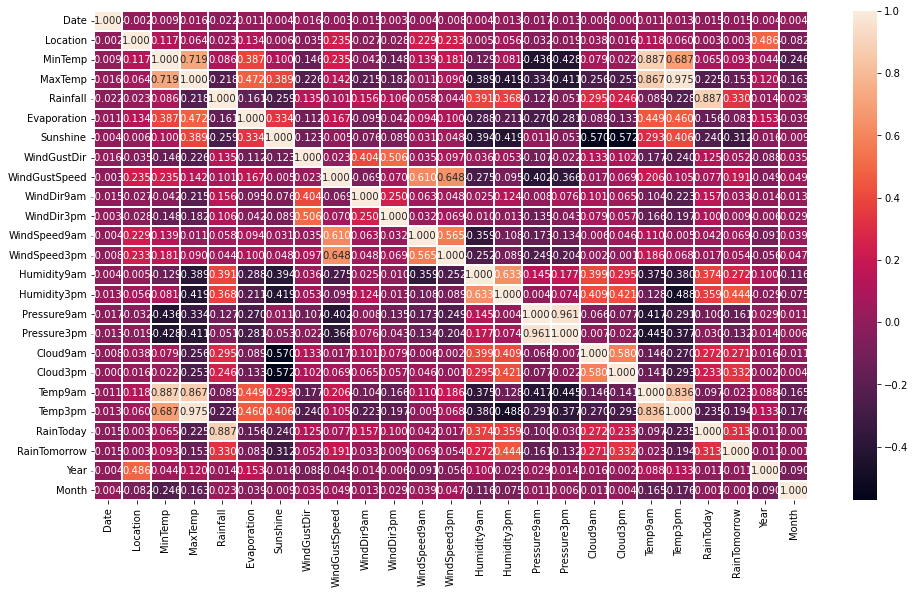

In [98]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [99]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444154
Cloud3pm         0.332197
Rainfall         0.330204
RainToday        0.312929
Humidity9am      0.271737
Cloud9am         0.270678
WindGustSpeed    0.190813
MinTemp          0.092922
WindSpeed9am     0.069068
WindSpeed3pm     0.054401
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Month           -0.001243
Year            -0.011066
Date            -0.015461
Temp9am         -0.023146
Evaporation     -0.083350
Pressure3pm     -0.131510
MaxTemp         -0.153002
Pressure9am     -0.160815
Temp3pm         -0.194209
Sunshine        -0.312082
Name: RainTomorrow, dtype: float64

# Visualizing the correlation between label and features using bar plot

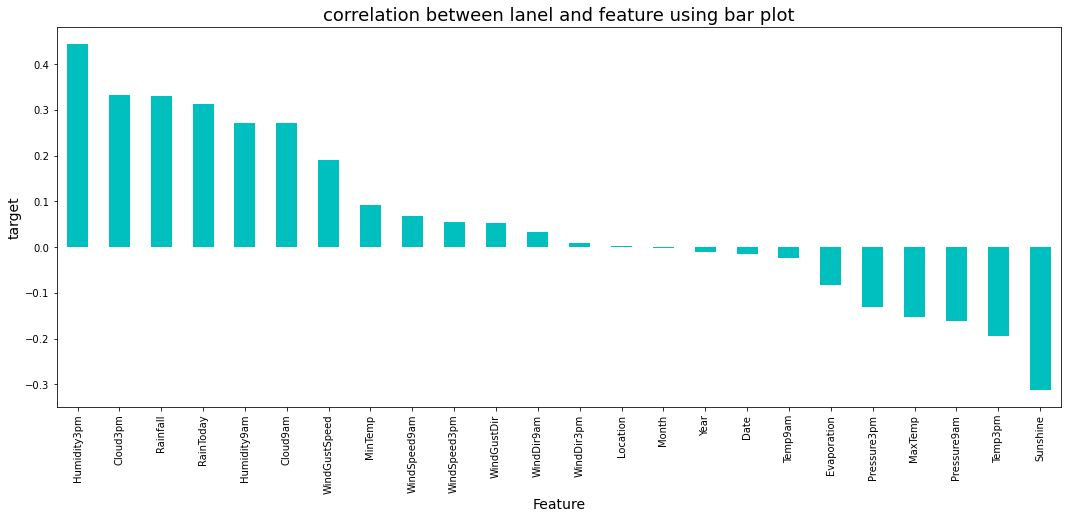

In [100]:
plt.figure(figsize=(18,7))
df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [101]:
# handling skewness on RainTomorrow
zero  = df1[df1['RainTomorrow']==0]
one = df1[df1['RainTomorrow']==1]

from sklearn.utils import resample
# upsample minority (churn yes/one)
upsample = resample(one, replace = True, n_samples = 5000) 
df1 = pd.concat([zero, upsample])

from sklearn.utils import shuffle
df1 = shuffle(df1)

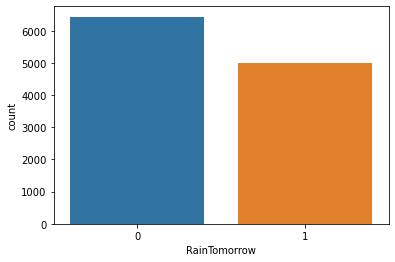

In [102]:
sns.countplot(x='RainTomorrow',data=df1)
plt.show()

# Dividing data in feature and Label

In [103]:
x=df1.drop(columns='RainTomorrow')#Feature
y=df1.RainTomorrow#Target

In [104]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.21149921,  0.69096804, -0.4909461 , ..., -0.6509478 ,
         0.75994015, -0.13247257],
       [ 1.1790431 ,  1.32149706,  0.70220898, ...,  1.5362215 ,
         1.96021028, -0.72530675],
       [ 0.04068962,  1.32149706,  0.85135337, ..., -0.6509478 ,
         1.96021028, -1.61455803],
       ...,
       [-0.64232247, -0.25482549,  0.70220898, ..., -0.6509478 ,
        -0.84042004, -1.61455803],
       [ 1.29287844, -1.20061902,  0.5157785 , ...,  1.5362215 ,
        -0.44032999,  0.46036162],
       [-1.43916991, -1.20061902,  0.83271032, ..., -0.6509478 ,
        -0.04023995, -1.61455803]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [105]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [106]:
vif

,vif,feature
0,1.007280,Date
1,1.550014,Location
2,8.779505,MinTemp
3,22.914229,MaxTemp
4,5.640831,Rainfall
5,1.498248,Evaporation
6,2.011063,Sunshine
7,1.575328,WindGustDir
8,2.408679,WindGustSpeed
9,1.358393,WindDir9am


In [107]:
x.drop('Temp3pm',axis=1,inplace=True)
x.drop('MaxTemp',axis=1,inplace=True)

In [108]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,Date,1.006715
1,Location,1.547858
2,MinTemp,8.750575
3,Rainfall,5.633480
4,Evaporation,1.476892
5,Sunshine,2.009578
6,WindGustDir,1.571805
7,WindGustSpeed,2.378144
8,WindDir9am,1.348077
9,WindDir3pm,1.486230


In [109]:
x.drop('Pressure9am',axis=1,inplace=True)

In [110]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,Date,1.006310
1,Location,1.547747
2,MinTemp,8.667457
3,Rainfall,5.592072
4,Evaporation,1.460712
5,Sunshine,1.996948
6,WindGustDir,1.557758
7,WindGustSpeed,2.370992
8,WindDir9am,1.321026
9,WindDir3pm,1.402333


# TRAIN TEST SPLIT

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# MODEL BUILDING

In [112]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [113]:
# list model name and accuracies
models = []
accuracies = []

In [114]:
def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(10,9)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

# 1. Logistic Regression

Accuracy =  0.7545904983969688 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1932
           1       0.73      0.70      0.71      1499

    accuracy                           0.75      3431
   macro avg       0.75      0.75      0.75      3431
weighted avg       0.75      0.75      0.75      3431

Confusion Matrix: 
 [[1534  398]
 [ 444 1055]]


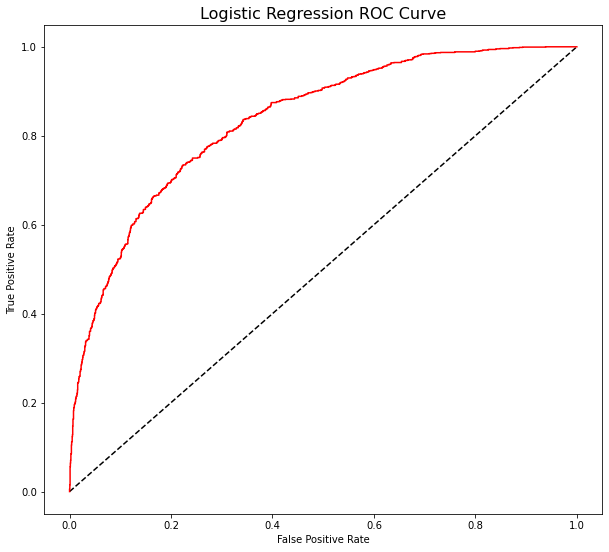

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 2. Decision Tree

Accuracy =  0.9064412707665404 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1932
           1       0.86      0.95      0.90      1499

    accuracy                           0.91      3431
   macro avg       0.90      0.91      0.91      3431
weighted avg       0.91      0.91      0.91      3431

Confusion Matrix: 
 [[1693  239]
 [  82 1417]]


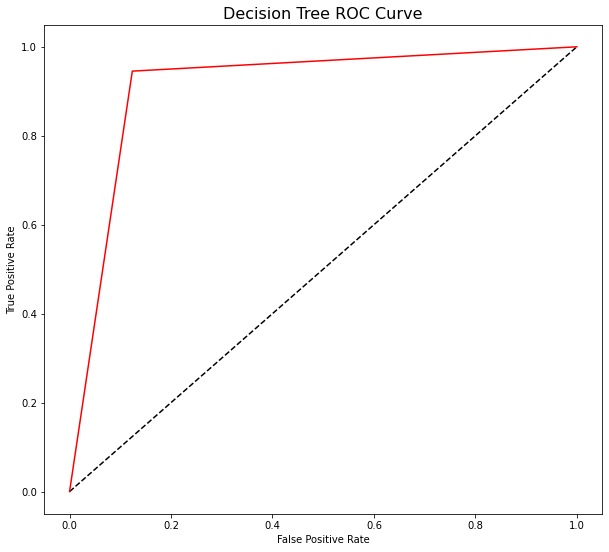

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Decision Tree'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 3. Suport Vector Machine (SVM)

In [117]:
from sklearn import svm
svmc = svm.SVC()
model = svmc.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

model_name = 'SVM'
models.append(model_name)
accuracies.append(acc)

Accuracy =  0.7729524919848441 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1932
           1       0.75      0.71      0.73      1499

    accuracy                           0.77      3431
   macro avg       0.77      0.77      0.77      3431
weighted avg       0.77      0.77      0.77      3431

Confusion Matrix: 
 [[1586  346]
 [ 433 1066]]


# 4. XG Boost

Accuracy =  0.9323812299621101 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1932
           1       0.90      0.95      0.92      1499

    accuracy                           0.93      3431
   macro avg       0.93      0.93      0.93      3431
weighted avg       0.93      0.93      0.93      3431

Confusion Matrix: 
 [[1772  160]
 [  72 1427]]


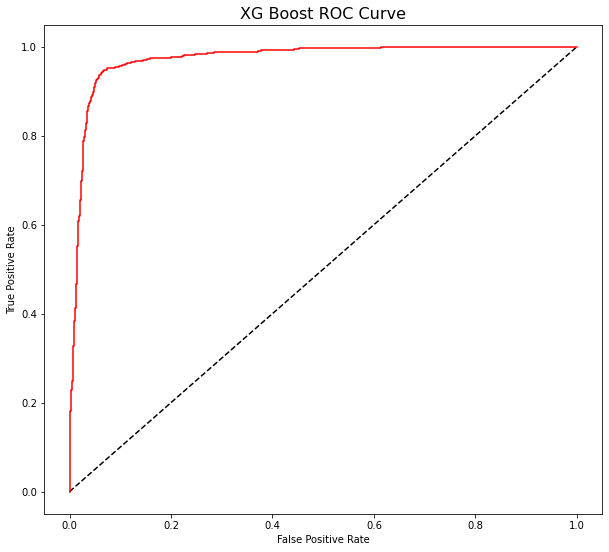

In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'XG Boost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 5. Adaboost

Accuracy =  0.7729524919848441 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1932
           1       0.76      0.70      0.73      1499

    accuracy                           0.77      3431
   macro avg       0.77      0.76      0.77      3431
weighted avg       0.77      0.77      0.77      3431

Confusion Matrix: 
 [[1606  326]
 [ 453 1046]]


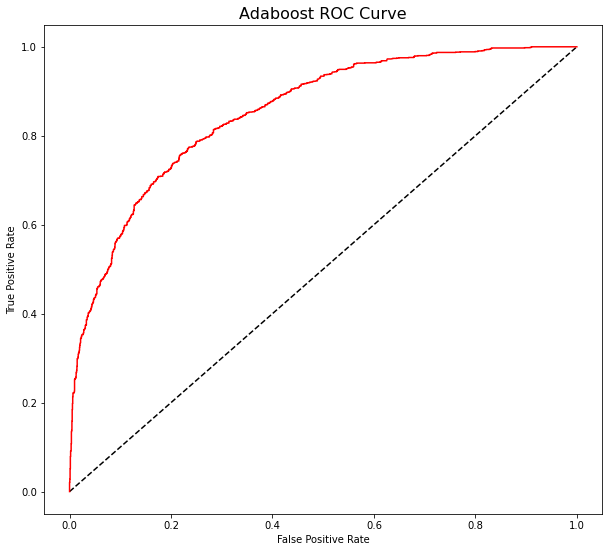

In [119]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
model = adb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Adaboost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 6. Random Forest

Accuracy =  0.941125036432527 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1932
           1       0.92      0.95      0.93      1499

    accuracy                           0.94      3431
   macro avg       0.94      0.94      0.94      3431
weighted avg       0.94      0.94      0.94      3431

Confusion Matrix: 
 [[1805  127]
 [  75 1424]]


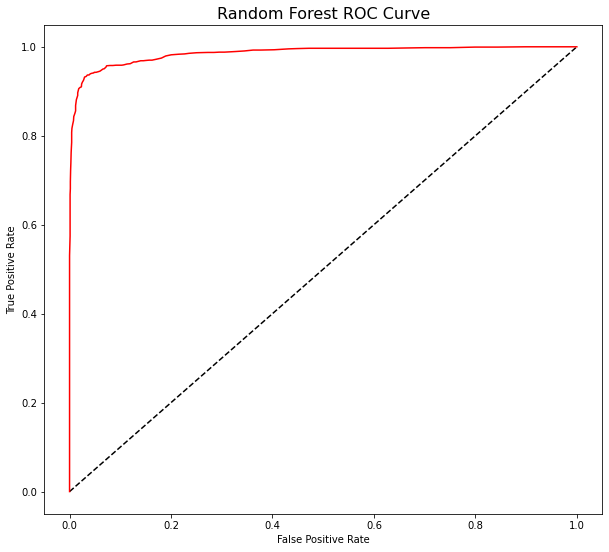

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# MODEL COMPARASION

In [121]:
df_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
df_model = df_model.sort_values(by='acc', ascending=False)

In [122]:
print(df_model)

                 model       acc
5        Random Forest  0.941125
3             XG Boost  0.932381
1        Decision Tree  0.906441
2                  SVM  0.772952
4             Adaboost  0.772952
0  Logistic Regression  0.754590


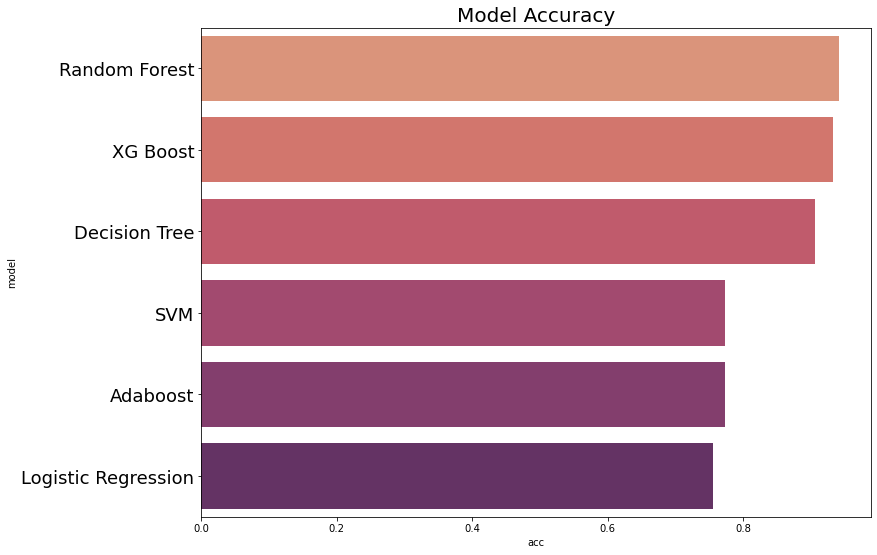

In [123]:
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
ax = sns.barplot(data=df_model, x='acc', y='model', palette='flare')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.show()

# highest accuracy by Random forest with 88% and lowest by Logistic Regression with 75%

# Do Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10)}

In [126]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [127]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [128]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [129]:
cnn=RandomForestClassifier(criterion='entropy',max_depth=14,max_leaf_nodes=5,min_samples_split= 3)

In [130]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=5,
                       min_samples_split=3)

In [131]:
cnn.score(x_train,y_train)

0.7683368736723729

In [132]:
cnn.score(x_test,y_test)

0.753133197318566

# Model Building For Predicting Rainfall (Regression)

In [133]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
8128,4,8,123,155,0,0,36,1,14,1,...,229,232,5,3,131,161,0,0,6,5
3376,25,10,187,154,28,18,20,15,34,14,...,47,21,7,5,182,160,1,1,9,3
4128,15,10,195,203,0,18,20,3,17,4,...,137,131,5,5,227,207,0,0,9,0
4449,9,11,149,86,2,18,20,11,21,12,...,222,240,1,4,113,94,0,1,1,4
7299,29,8,196,222,0,30,53,15,15,3,...,3,28,5,3,244,211,0,0,3,11


# Dividing data in feature and Label

In [134]:
df1['Rainfall'].value_counts()

0     6461
28    2448
2      532
23     342
3      272
5      173
9      124
10     117
7      111
8       98
13      93
15      82
22      75
21      75
12      68
19      66
25      60
26      59
17      56
27      55
1       31
4        9
16       8
11       5
14       4
20       4
18       2
6        2
24       2
Name: Rainfall, dtype: int64

In [135]:
x = df1.drop(columns=['Rainfall'],axis=1)
y = df1['Rainfall']

In [136]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.21149921,  0.69096804, -0.4909461 , ..., -0.88154497,
         0.75994015, -0.13247257],
       [ 1.1790431 ,  1.32149706,  0.70220898, ...,  1.13437207,
         1.96021028, -0.72530675],
       [ 0.04068962,  1.32149706,  0.85135337, ..., -0.88154497,
         1.96021028, -1.61455803],
       ...,
       [-0.64232247, -0.25482549,  0.70220898, ..., -0.88154497,
        -0.84042004, -1.61455803],
       [ 1.29287844, -1.20061902,  0.5157785 , ...,  1.13437207,
        -0.44032999,  0.46036162],
       [-1.43916991, -1.20061902,  0.83271032, ..., -0.88154497,
        -0.04023995, -1.61455803]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [137]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [138]:
vif

,vif,feature
0,1.007130,Date
1,1.560048,Location
2,8.735533,MinTemp
3,22.884632,MaxTemp
4,1.492183,Evaporation
5,2.034644,Sunshine
6,1.576451,WindGustDir
7,2.497820,WindGustSpeed
8,1.358258,WindDir9am
9,1.489154,WindDir3pm


In [139]:
x.drop('Temp3pm',axis=1,inplace=True)
x.drop('MaxTemp',axis=1,inplace=True)

In [140]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,Date,1.006537
1,Location,1.557859
2,MinTemp,8.704230
3,Evaporation,1.470444
4,Sunshine,2.032913
5,WindGustDir,1.572838
6,WindGustSpeed,2.467494
7,WindDir9am,1.347898
8,WindDir3pm,1.486939
9,WindSpeed9am,2.037634


In [141]:
x.drop('Pressure9am',axis=1,inplace=True)

In [142]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,Date,1.006255
1,Location,1.557852
2,MinTemp,8.610325
3,Evaporation,1.455931
4,Sunshine,2.018580
5,WindGustDir,1.558331
6,WindGustSpeed,2.456533
7,WindDir9am,1.320353
8,WindDir3pm,1.403071
9,WindSpeed9am,2.036853


# TRAIN TEST SPLIT

In [143]:
from sklearn.model_selection import train_test_split

# MODEL BUILDING

# * LinearRegression

In [144]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [145]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.8242817696887959
 At random state 0 , the testing accuracy is :- 0.8139072966035491


 At random state 1 , the Training accuracy is :- 0.8204807445116185
 At random state 1 , the testing accuracy is :- 0.8291784020746886


 At random state 2 , the Training accuracy is :- 0.8221028715060918
 At random state 2 , the testing accuracy is :- 0.8226368352784449


 At random state 3 , the Training accuracy is :- 0.8208492789740374
 At random state 3 , the testing accuracy is :- 0.82774835030589


 At random state 4 , the Training accuracy is :- 0.8282770787882753
 At random state 4 , the testing accuracy is :- 0.7972001971204628


 At random state 5 , the Training accuracy is :- 0.8252802062440744
 At random state 5 , the testing accuracy is :- 0.8098066169160492


 At random state 6 , the Training accuracy is :- 0.8195204968699671
 At random state 6 , the testing accuracy is :- 0.8324941915938893


 At random state 7 , the Training accuracy 

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [147]:
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.8204807445116185


In [149]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8291784020746886


# Cross Validation of the Model

In [150]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8233383418401665 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 3 the CV Score is 0.8233574584447542 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 4 the CV Score is 0.8233241342713532 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 5 the CV Score is 0.823072727910249 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 6 the CV Score is 0.8232840336471235 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 7 the CV Score is 0.8231724136488586 and accuracy for training is -0.8160243271695504 and accuracy for testing is -0.8619768227367348


At cross fold 8 the CV Score is 0.8230089364332642 and accuracy for training is -0.8160243271695504 a

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

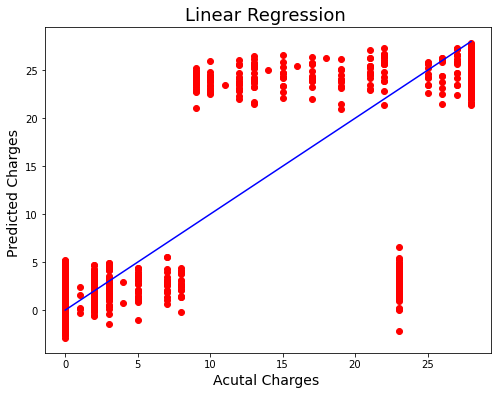

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [153]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')

lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [154]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.00011133381076287853

In [155]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00011133381076287853)

In [156]:
lasso_reg.score(x_train,y_train)#Testing Score

0.8204807434039878

In [157]:
lasso_reg.score(x_test,y_test) #Testing Score

0.8291784019944409

# Using Ridge Regression Model.

In [158]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [159]:
ridgecv.alpha_

0.001

In [160]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [161]:
ridge_model.score(x_train,y_train)#Training Score

0.8204807445113499

In [162]:
ridge_model.score(x_test,y_test)#Testing Score

0.8291784002906689

# Model Evaluation

In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [164]:
y_pred=ridge_model.predict(x_test)

In [165]:
#MAE
mean_absolute_error(y_test,y_pred)

2.9223935718655616

In [166]:
#MSE
mean_squared_error(y_test,y_pred)

23.725600546592695

In [167]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

4.870893198027718

# Lets Plot With Decision Tree Regressor

In [168]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [169]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.8933651240103456


 At random state 1 , the Training accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.8958802787561421


 At random state 2 , the Training accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.9158433630960441


 At random state 3 , the Training accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.9270780651044394


 At random state 4 , the Training accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8979157536790199


 At random state 5 , the Training accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.9204557505017452


 At random state 6 , the Training accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.9223667399191008


 At random state 7 , the Training accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.9213884432336962


 At random state 8 , the

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [171]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [172]:
#Lets Print Training Score
pred_train=dt.predict(x_train)
print(r2_score(y_train,pred_train))

1.0


In [173]:
#Lets Print Testing Score
train_pred=dt.predict(x_test)
print(r2_score(y_test,train_pred))

0.9230389378761982


# Cross Validation of the Model

In [174]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.873050429464207 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 3 the CV Score is 0.9062125766183519 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 4 the CV Score is 0.910592590750112 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 5 the CV Score is 0.9150879577926936 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 6 the CV Score is 0.915734636880915 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 7 the CV Score is 0.9191192173537405 and accuracy for training is -1.0226054508161142 and accuracy for testing is -1.02504895503328


At cross fold 8 the CV Score is 0.9174027742566 and accuracy for training is -1.0226054508161142 and accuracy for t

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

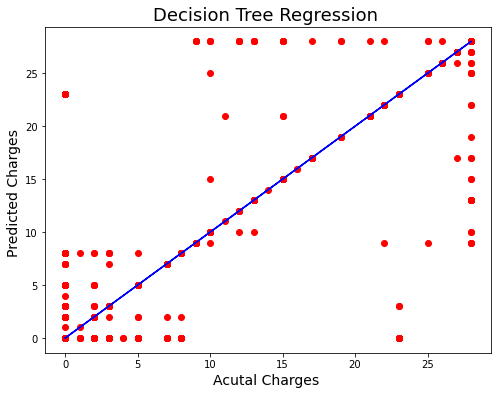

In [175]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Decision Tree Regression ",fontsize=18)
plt.savefig('dt.png')
plt.show()

# Lets Plot With Gradient Boosting Regressor

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [177]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    gbr.fit(x_train,y_train)
    x_pred=gbr.predict(x_train)
    y_pred=gbr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.8768696402400574
 At random state 0 , the testing accuracy is :- 0.8628825247809127


 At random state 1 , the Training accuracy is :- 0.8776496174889137
 At random state 1 , the testing accuracy is :- 0.8685111751403481


 At random state 2 , the Training accuracy is :- 0.8754596268555745
 At random state 2 , the testing accuracy is :- 0.868150057921689


 At random state 3 , the Training accuracy is :- 0.8775830452262979
 At random state 3 , the testing accuracy is :- 0.8660358570986016


 At random state 4 , the Training accuracy is :- 0.881288556554574
 At random state 4 , the testing accuracy is :- 0.8524795242612482


 At random state 5 , the Training accuracy is :- 0.8769657989255206
 At random state 5 , the testing accuracy is :- 0.8646935241326874


 At random state 6 , the Training accuracy is :- 0.8760829543270531
 At random state 6 , the testing accuracy is :- 0.8700722018010476


 At random state 7 , the Training accuracy 

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)

In [179]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [180]:
#Lets Print Training Score
pred_train=gbr.predict(x_train)
print(r2_score(y_train,pred_train))

0.8754319997676305


In [181]:
#Lets Print Testing Score
train_pred=gbr.predict(x_test)
print(r2_score(y_test,train_pred))

0.8743550539978189


# Cross Validation of the Model

In [182]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(gbr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8638471421522447 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 3 the CV Score is 0.8664592184930267 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 4 the CV Score is 0.867338200332755 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 5 the CV Score is 0.8660601457793959 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 6 the CV Score is 0.8670827738498407 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 7 the CV Score is 0.8664811722318976 and accuracy for training is -0.8407079801460493 and accuracy for testing is -0.8142206600492741


At cross fold 8 the CV Score is 0.8664768682431072 and accuracy for training is -0.8407079801460493 a

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

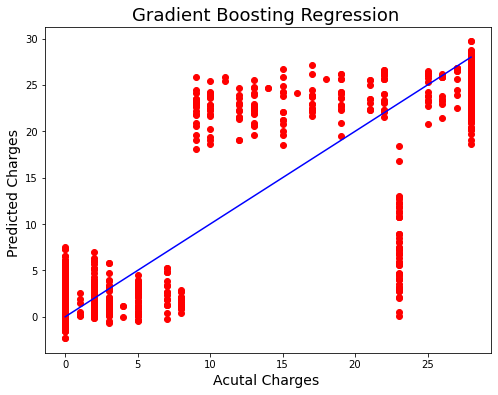

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Gradient Boosting Regression ",fontsize=18)
plt.savefig('gbr.png')
plt.show()

# Lets Plot With Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [185]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.992785209501664
 At random state 0 , the testing accuracy is :- 0.9505557567654299


 At random state 1 , the Training accuracy is :- 0.9931584077024663
 At random state 1 , the testing accuracy is :- 0.9500001811030184


 At random state 2 , the Training accuracy is :- 0.9933661620401827
 At random state 2 , the testing accuracy is :- 0.9461569981510985


 At random state 3 , the Training accuracy is :- 0.9930564479550973
 At random state 3 , the testing accuracy is :- 0.9487227366114235


 At random state 4 , the Training accuracy is :- 0.9929956125035868
 At random state 4 , the testing accuracy is :- 0.9426229742551173


 At random state 5 , the Training accuracy is :- 0.9929534664433759
 At random state 5 , the testing accuracy is :- 0.952560317584892


 At random state 6 , the Training accuracy is :- 0.9928489720203667
 At random state 6 , the testing accuracy is :- 0.9503305790987481


 At random state 7 , the Training accuracy 

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=59)

In [187]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [188]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9932686498179788


In [189]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.9563442592862942


# Cross Validation of the Model

In [190]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.9282644746490654 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 3 the CV Score is 0.943018566215193 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 4 the CV Score is 0.9470559428975996 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 5 the CV Score is 0.9509600238608613 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 6 the CV Score is 0.9514604318593097 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 7 the CV Score is 0.9531415308239773 and accuracy for training is -0.9392472756681822 and accuracy for testing is -0.8885421584395183


At cross fold 8 the CV Score is 0.953060592861398 and accuracy for training is -0.9392472756681822 an

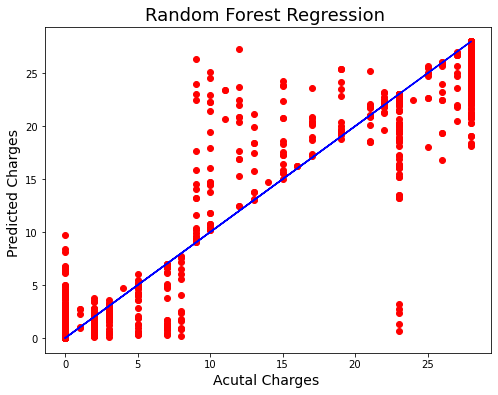

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Random Forest Regression ",fontsize=18)
plt.savefig('rf.png')
plt.show()

# Lets Save Our Model

In [194]:
import pickle
filename='Rainfall.'
pickle.dump(rf,open(filename,'wb'))

In [196]:
# batch  No - ds0522
# Data Trained